In [31]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

import warnings
warnings.filterwarnings('ignore')


In [32]:
df = pd.read_csv("sp500.csv") 

df.head(5) 

,Symbol,Name,Sector,Price,Dividend Yield,Price/Earnings,Earnings/Share,Book Value,52 week low,52 week high,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Co.,Industrials,141.14,2.12,20.33,6.900,26.668,107.15,143.37,92.345,8.121,2.95,5.26,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,ABT,Abbott Laboratories,Health Care,39.60,1.82,25.93,1.529,15.573,32.70,40.49,59.477,4.359,2.74,2.55,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABBV,AbbVie Inc.,Health Care,53.95,3.02,20.87,2.570,2.954,40.10,54.78,85.784,7.190,4.48,18.16,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ACN,Accenture,Information Technology,79.79,2.34,19.53,4.068,8.326,69.00,85.88,50.513,4.423,1.75,9.54,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACE,ACE Limited,Financials,102.91,2.21,10.00,10.293,86.897,84.73,104.07,34.753,4.275,1.79,1.18,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [33]:
# Посчитаю все неподходящие для обработки NaN-значения в полученном датасете и отсортирую их в обратном порядке
df.isna().sum()

Symbol             0
Name               0
Sector             0
Price              0
Dividend Yield    76
Price/Earnings    20
Earnings/Share     1
Book Value         1
52 week low        1
52 week high       1
Market Cap         4
EBITDA             1
Price/Sales        4
Price/Book        14
SEC Filings        0
dtype: int64

In [5]:
# Заполню все пропущенные данные (NaN-значения) в столбцах, используя метод fillna, чтобы не нарушать баланс в датасете.
df['Dividend Yield'].fillna(df['Dividend Yield'].mean(), inplace=True)
df['Price/Earnings'].fillna(df['Price/Earnings'].mean(), inplace=True)
df['Earnings/Share'].fillna(df['Earnings/Share'].mean(), inplace=True)
df['Book Value'].fillna(df['Book Value'].mean(), inplace=True)
df['52 week low'].fillna(df['52 week low'].mean(), inplace=True)
df['52 week high'].fillna(df['52 week high'].mean(), inplace=True)
df['Market Cap'].fillna(df['Market Cap'].mean(), inplace=True)
df['EBITDA'].fillna(df['EBITDA'].mean(), inplace=True)
df['Price/Sales'].fillna(df['Price/Sales'].mean(), inplace=True)
df['Price/Book'].fillna(df['Price/Book'].mean(), inplace=True)

In [6]:
df.isna().sum()

Symbol            0
Name              0
Sector            0
Price             0
Dividend Yield    0
Price/Earnings    0
Earnings/Share    0
Book Value        0
52 week low       0
52 week high      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
SEC Filings       0
dtype: int64

In [38]:
# Закодирую категориальные переменные, используя функцию get_dummies
Sectors = pd.get_dummies(df.Sector, prefix='Sector')

# Выведу первые пять значений датасета, что получился в итоге
Sectors.head(5)
Sectors

,Sector_Consumer Discretionary,Sector_Consumer Discretionary,Sector_Consumer Staples,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Industries,Sector_Information Technology,Sector_Materials,Sector_Telecommunications Services,Sector_Utilities
0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,1,0,0,0
496,1,0,0,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,1,0,0,0,0,0,0
498,0,0,0,0,0,1,0,0,0,0,0,0,0


In [8]:
# Удалю лишние столбцы (нулевые)
df = df.drop(columns=['Sector','Symbol', 'Name', 'SEC Filings']) 

# Отображу получившийся датасет
df

,Price,Dividend Yield,Price/Earnings,Earnings/Share,Book Value,52 week low,52 week high,Market Cap,EBITDA,Price/Sales,Price/Book
0,141.14,2.120000,20.33,6.900,26.668,107.15,143.37,92.345,8.1210,2.95,5.26
1,39.60,1.820000,25.93,1.529,15.573,32.70,40.49,59.477,4.3590,2.74,2.55
2,53.95,3.020000,20.87,2.570,2.954,40.10,54.78,85.784,7.1900,4.48,18.16
3,79.79,2.340000,19.53,4.068,8.326,69.00,85.88,50.513,4.4230,1.75,9.54
4,102.91,2.210000,10.00,10.293,86.897,84.73,104.07,34.753,4.2750,1.79,1.18
...,...,...,...,...,...,...,...,...,...,...,...
495,35.02,2.131439,28.94,1.199,12.768,23.82,41.72,35.258,0.8873,7.48,2.72
496,74.77,1.930000,29.86,2.507,5.147,64.08,79.70,33.002,2.8640,2.49,14.55
497,101.84,0.810000,22.92,4.441,37.181,74.55,108.33,17.091,1.6890,3.68,2.74
498,28.43,0.560000,18.82,1.511,30.191,26.39,33.33,5.257,0.0000,2.49,0.94


In [9]:
# Объединю датасет с секторами с помощью функцию конкатенации
df = pd.concat([df, Sectors] , axis=1 )

# Вновь отображу датасет 
df

,Price,Dividend Yield,Price/Earnings,Earnings/Share,Book Value,52 week low,52 week high,Market Cap,EBITDA,Price/Sales,...,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Industries,Sector_Information Technology,Sector_Materials,Sector_Telecommunications Services,Sector_Utilities
0,141.14,2.120000,20.33,6.900,26.668,107.15,143.37,92.345,8.1210,2.95,...,0,0,0,0,1,0,0,0,0,0
1,39.60,1.820000,25.93,1.529,15.573,32.70,40.49,59.477,4.3590,2.74,...,0,0,0,1,0,0,0,0,0,0
2,53.95,3.020000,20.87,2.570,2.954,40.10,54.78,85.784,7.1900,4.48,...,0,0,0,1,0,0,0,0,0,0
3,79.79,2.340000,19.53,4.068,8.326,69.00,85.88,50.513,4.4230,1.75,...,0,0,0,0,0,0,1,0,0,0
4,102.91,2.210000,10.00,10.293,86.897,84.73,104.07,34.753,4.2750,1.79,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,35.02,2.131439,28.94,1.199,12.768,23.82,41.72,35.258,0.8873,7.48,...,0,0,0,0,0,0,1,0,0,0
496,74.77,1.930000,29.86,2.507,5.147,64.08,79.70,33.002,2.8640,2.49,...,0,0,0,0,0,0,0,0,0,0
497,101.84,0.810000,22.92,4.441,37.181,74.55,108.33,17.091,1.6890,3.68,...,0,0,0,1,0,0,0,0,0,0
498,28.43,0.560000,18.82,1.511,30.191,26.39,33.33,5.257,0.0000,2.49,...,0,0,1,0,0,0,0,0,0,0


In [10]:
# Выведу описательную статистику датасета
df.describe()

,Price,Dividend Yield,Price/Earnings,Earnings/Share,Book Value,52 week low,52 week high,Market Cap,EBITDA,Price/Sales,...,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Industries,Sector_Information Technology,Sector_Materials,Sector_Telecommunications Services,Sector_Utilities
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,77.36860,2.131439,29.887792,3.564842,301.611301,59.205015,84.668283,35.348525,3.700364,2.782359,...,0.002000,0.082000,0.164000,0.108000,0.128000,0.002000,0.128000,0.058000,0.012000,0.066000
std,87.59694,1.216265,68.743115,4.045437,6189.516604,62.217129,98.896445,54.618931,6.662336,2.519322,...,0.044721,0.274639,0.370646,0.310691,0.334424,0.044721,0.334424,0.233978,0.108994,0.248531
min,0.00000,0.040000,2.520000,-10.693000,-51.275000,3.800000,6.100000,0.208500,-0.331300,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.74500,1.350000,15.867500,1.653000,10.846250,31.007500,42.580000,9.871500,0.868700,1.220000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.35500,2.131439,20.480000,2.860500,19.099000,45.650000,63.570000,17.540000,1.638000,2.015000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,86.68000,2.635000,27.995000,4.432000,31.524750,66.490000,91.027500,35.025750,3.792750,3.352500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1197.12000,10.640000,1329.620000,41.727000,138425.453100,787.000000,1378.960000,529.000000,60.657000,17.840000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:

df.loc[(df['EBITDA'] <= 0), 'EBITDA'] = 0
df.loc[(df['EBITDA'] > 0), 'EBITDA'] = 1

df

,Price,Dividend Yield,Price/Earnings,Earnings/Share,Book Value,52 week low,52 week high,Market Cap,EBITDA,Price/Sales,...,Sector_Consumer Staples,Sector_Energy,Sector_Financials,Sector_Health Care,Sector_Industrials,Sector_Industries,Sector_Information Technology,Sector_Materials,Sector_Telecommunications Services,Sector_Utilities
0,141.14,2.120000,20.33,6.900,26.668,107.15,143.37,92.345,1.0,2.95,...,0,0,0,0,1,0,0,0,0,0
1,39.60,1.820000,25.93,1.529,15.573,32.70,40.49,59.477,1.0,2.74,...,0,0,0,1,0,0,0,0,0,0
2,53.95,3.020000,20.87,2.570,2.954,40.10,54.78,85.784,1.0,4.48,...,0,0,0,1,0,0,0,0,0,0
3,79.79,2.340000,19.53,4.068,8.326,69.00,85.88,50.513,1.0,1.75,...,0,0,0,0,0,0,1,0,0,0
4,102.91,2.210000,10.00,10.293,86.897,84.73,104.07,34.753,1.0,1.79,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,35.02,2.131439,28.94,1.199,12.768,23.82,41.72,35.258,1.0,7.48,...,0,0,0,0,0,0,1,0,0,0
496,74.77,1.930000,29.86,2.507,5.147,64.08,79.70,33.002,1.0,2.49,...,0,0,0,0,0,0,0,0,0,0
497,101.84,0.810000,22.92,4.441,37.181,74.55,108.33,17.091,1.0,3.68,...,0,0,0,1,0,0,0,0,0,0
498,28.43,0.560000,18.82,1.511,30.191,26.39,33.33,5.257,0.0,2.49,...,0,0,1,0,0,0,0,0,0,0


In [12]:
# Разделю выборку на обучающее (80% данных) и тестовое (20% данных) подмножества, данные по условию поставленной задачи. 
# 20% для тестового подмножества указываются в параметре test_size функции train_test_split в долях единицы.

# Удалю столбец "Прибыль до вычета процентов, налогов, износа и амортизации" - EBITDA
Y = df.pop("EBITDA") 
X = df

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
495    1.0
496    1.0
497    1.0
498    0.0
499    1.0
Name: EBITDA, Length: 500, dtype: float64

In [13]:
# Использую модель логистической регрессии
model = LogisticRegression(random_state=42)

# Подгоню нашу модель к обучающим данным с использованием метода .fit(). Он найдет коэффициенты для уравнения, указанного с помощью используемого алгоритма, в текущем случае - Логистической Регрессии.
model.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [14]:
# Вычислю массив списков, содержащих вероятности класса для точек входных данных.
probs = model.predict_proba(X_test)

In [15]:
# Выберу вероятности для логистической регрессии
lr_probs = probs[:,1]
# Посмотрим на содержимое списка
lr_probs

array([0.15338361, 0.99104038, 0.98434168, 0.97825688, 1.        ,
       0.98257108, 0.88455422, 0.93336201, 0.97736939, 0.97903228,
       0.946187  , 0.97162891, 0.99772019, 0.98789592, 0.94078538,
       0.61079573, 0.69367323, 0.9680869 , 0.96385116, 0.99985977,
       0.95984987, 0.91221996, 0.94800762, 0.55782405, 0.97196948,
       0.96559504, 0.94947832, 0.97961826, 0.54216616, 0.98039668,
       0.98618196, 0.94532653, 0.99997105, 0.89297443, 0.99908087,
       0.98537605, 0.97131323, 0.99737755, 0.9993424 , 0.9193795 ,
       0.99881566, 0.96085009, 0.97109671, 0.99884712, 0.91500562,
       0.98734686, 0.98984072, 0.97449575, 0.96122726, 0.83599794,
       0.99563519, 0.97555775, 0.99256692, 0.98112044, 0.94260539,
       0.98584469, 0.98411544, 0.97338782, 0.86467086, 0.99836268,
       0.98757087, 0.9862209 , 0.97149139, 0.98366566, 0.89043   ,
       0.88592691, 0.99559152, 0.99126117, 0.99030971, 0.99487653,
       0.9892276 , 0.61848236, 0.98458651, 0.99186096, 0.96003

In [16]:
# Вычислю площадь (параметр AUC - Area Under Curve) под нашей будущей ROC-кривой
lr_auc = roc_auc_score(Y_test, lr_probs)
# Отображу его
print(f'LogisticRegression: ROC AUC (Площадь под кривой) = {lr_auc:.5f}')

LogisticRegression: ROC AUC (Площадь под кривой) = 0.78546


In [17]:
# Вычислю значения для построения прямой рабочей характеристики приёмника (долю ложных положительных классификаций, порог и долю верных положительных классификаций и площадь)
fpr, tpr, treshold = roc_curve(Y_test, lr_probs)
roc_auc = auc(fpr, tpr)
# Просмотрим их
print(fpr)
print(tpr)
print(roc_auc)

[0.         0.         0.         0.16666667 0.16666667 0.33333333
 0.33333333 0.5        0.5        0.66666667 0.66666667 0.83333333
 0.83333333 1.         1.        ]
[0.         0.0106383  0.5212766  0.5212766  0.55319149 0.55319149
 0.76595745 0.76595745 0.90425532 0.90425532 0.9787234  0.9787234
 0.9893617  0.9893617  1.        ]
0.7854609929078015


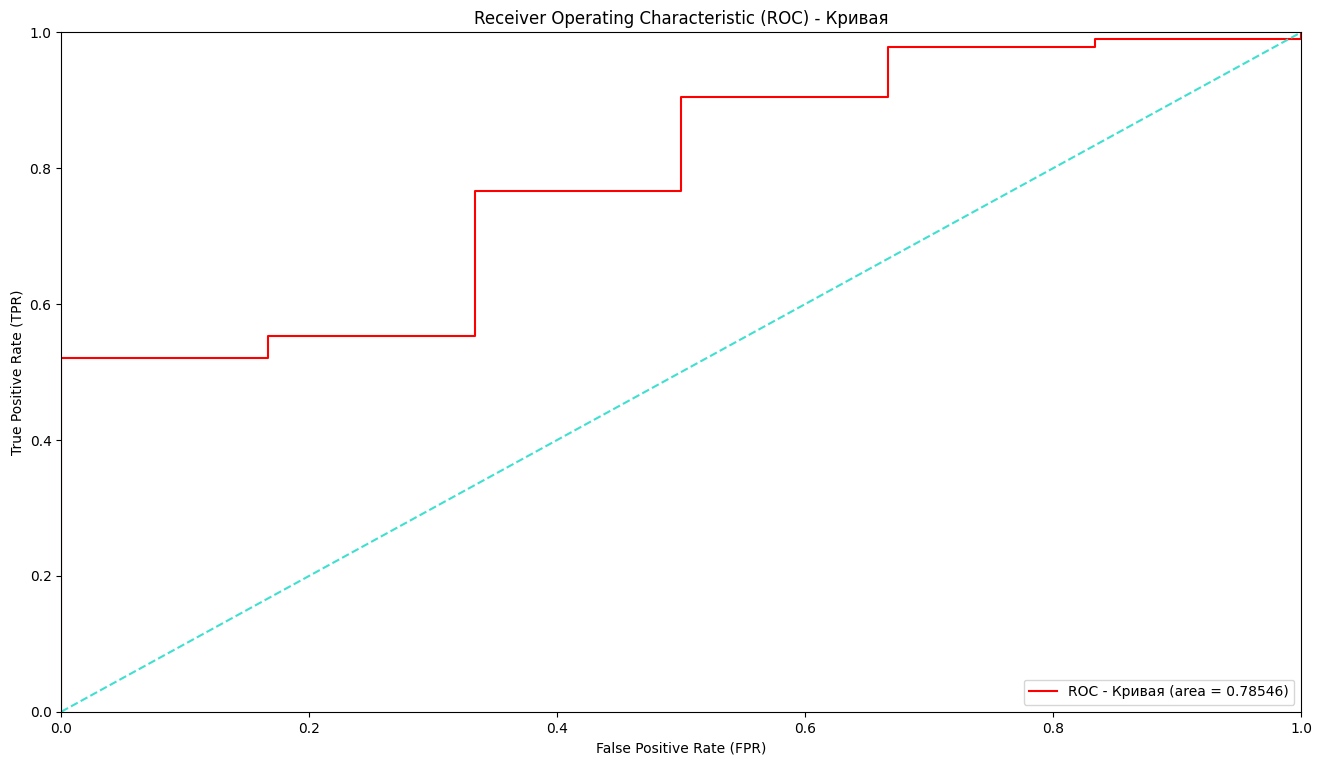

In [18]:
# Организую построение кривой с помощью pyplot'а

plt.figure(figsize=(16, 9), dpi=100)

plt.plot(fpr, tpr, color='red', label=f'ROC - Кривая (area = {roc_auc:.5f})')
plt.plot([0, 1], [0, 1], color='turquoise', linestyle='--')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

plt.title('Receiver Operating Characteristic (ROC) - Кривая')

plt.legend(loc="lower right")

plt.show()

In [19]:
lr_probs

array([0.15338361, 0.99104038, 0.98434168, 0.97825688, 1.        ,
       0.98257108, 0.88455422, 0.93336201, 0.97736939, 0.97903228,
       0.946187  , 0.97162891, 0.99772019, 0.98789592, 0.94078538,
       0.61079573, 0.69367323, 0.9680869 , 0.96385116, 0.99985977,
       0.95984987, 0.91221996, 0.94800762, 0.55782405, 0.97196948,
       0.96559504, 0.94947832, 0.97961826, 0.54216616, 0.98039668,
       0.98618196, 0.94532653, 0.99997105, 0.89297443, 0.99908087,
       0.98537605, 0.97131323, 0.99737755, 0.9993424 , 0.9193795 ,
       0.99881566, 0.96085009, 0.97109671, 0.99884712, 0.91500562,
       0.98734686, 0.98984072, 0.97449575, 0.96122726, 0.83599794,
       0.99563519, 0.97555775, 0.99256692, 0.98112044, 0.94260539,
       0.98584469, 0.98411544, 0.97338782, 0.86467086, 0.99836268,
       0.98757087, 0.9862209 , 0.97149139, 0.98366566, 0.89043   ,
       0.88592691, 0.99559152, 0.99126117, 0.99030971, 0.99487653,
       0.9892276 , 0.61848236, 0.98458651, 0.99186096, 0.96003

In [20]:
np.array(Y_test)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [21]:
tpr1 = []
fpr1 = []
for threshold in np.arange(0, 1, 0.1):
    tp = 0 
    fp = 0 
    fn = 0 
    tn = 0 
    for predicted_prob, actual in zip( lr_probs, Y_test ):    
        predicted = 1 if predicted_prob >= threshold else 0
        
        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1
        
        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1

    tpr1.append(tp/(tp+fn))
    fpr1.append(fp/(fp+tn))

tpr1 = np.array(tpr1)
fpr1 = np.array(fpr1)

print(fpr1)
print(tpr1)

[1.         1.         1.         1.         1.         1.
 0.83333333 0.66666667 0.66666667 0.5       ]
[1.         1.         0.9893617  0.9893617  0.9893617  0.9893617
 0.9787234  0.95744681 0.95744681 0.89361702]


In [22]:
roc_auc1 = auc(fpr1, tpr1)
print(roc_auc1)

0.47960992907801414


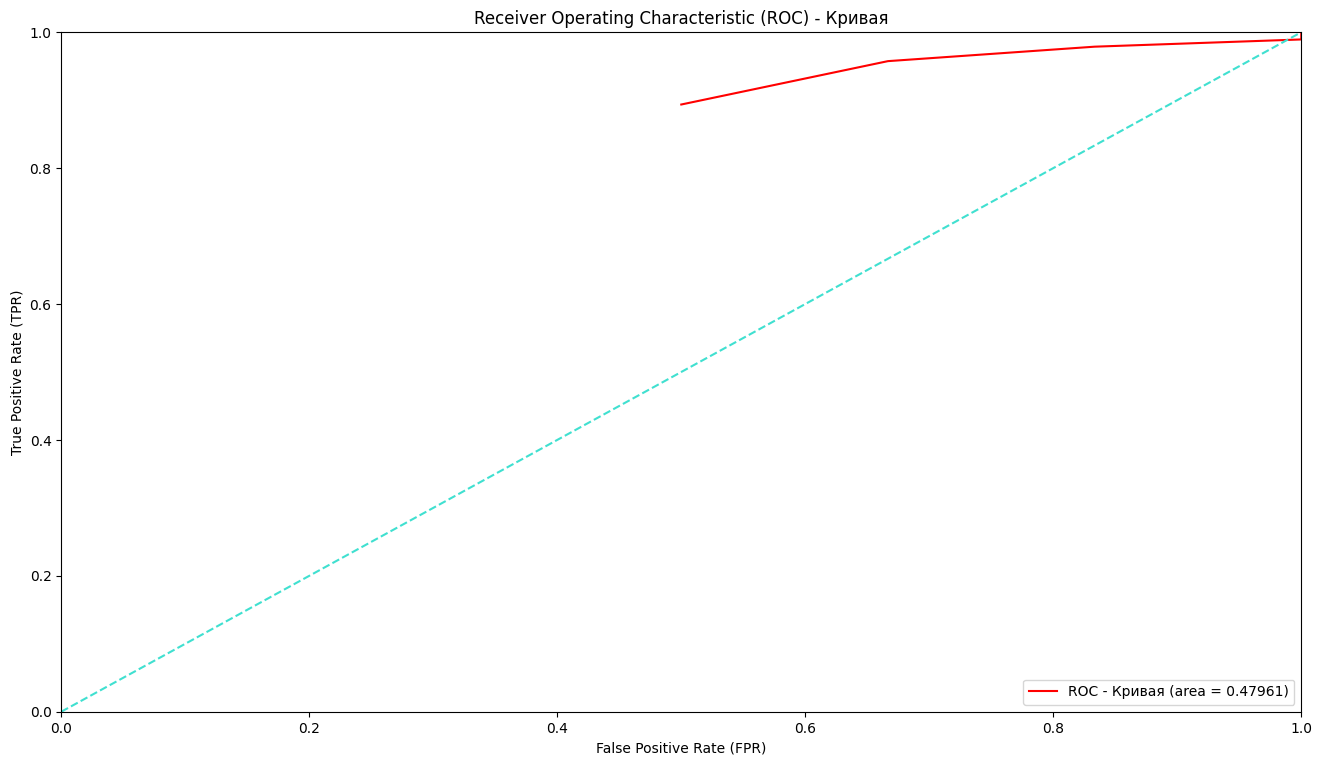

In [23]:
plt.figure(figsize=(16, 9), dpi=100)

plt.plot(fpr1, tpr1, color='red', label=f'ROC - Кривая (area = {roc_auc1:.5f})')
plt.plot([0, 1], [0, 1], color='turquoise', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

plt.title('Receiver Operating Characteristic (ROC) - Кривая')

plt.legend(loc="lower right")

plt.show()

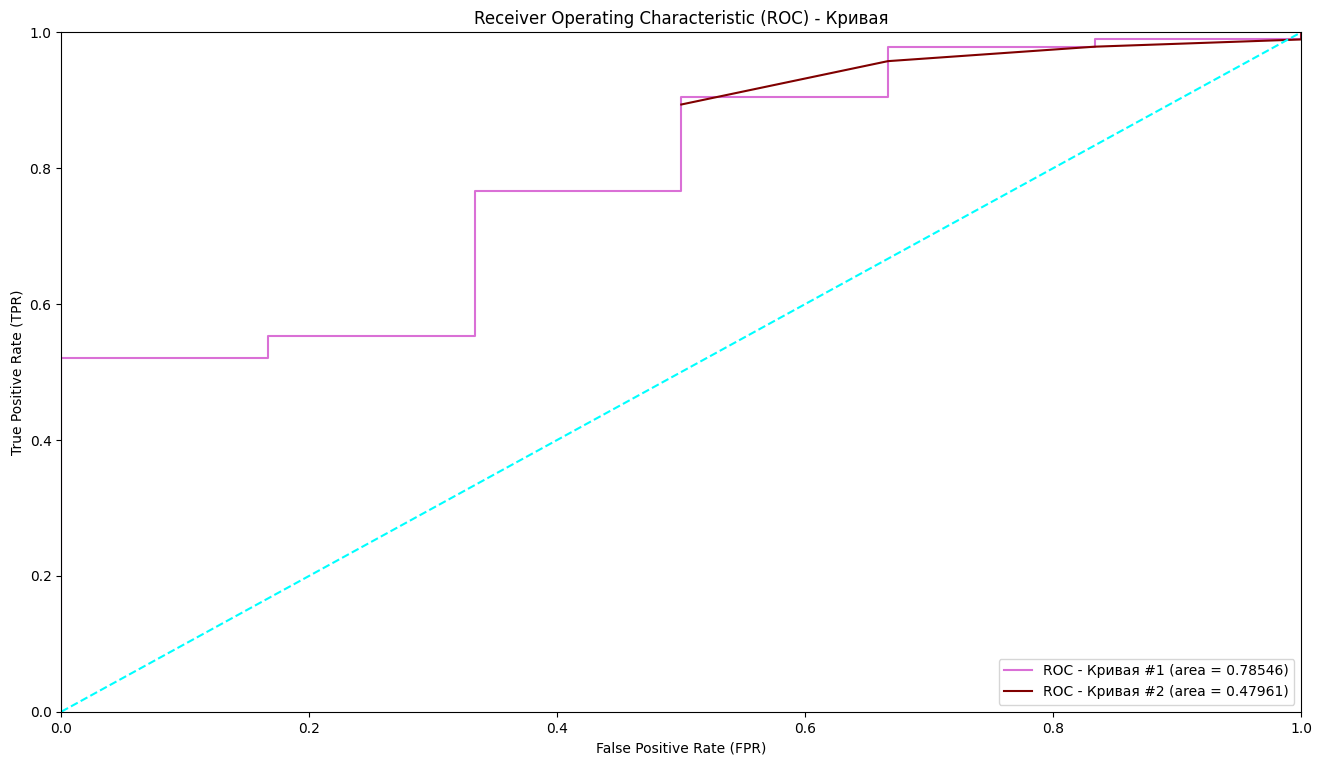

In [24]:
plt.figure(figsize=(16, 9), dpi=100)

plt.plot(fpr, tpr, color='orchid', label=f'ROC - Кривая #1 (area = {roc_auc:.5f})')

plt.plot(fpr1, tpr1, color='maroon', label=f'ROC - Кривая #2 (area = {roc_auc1:.5f})')

plt.plot([0, 1], [0, 1], color='cyan', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

plt.title('Receiver Operating Characteristic (ROC) - Кривая')

plt.legend(loc="lower right")

plt.show()

In [25]:
yhat = model.predict(X_test)

In [26]:
precision, recall, thresholds = precision_recall_curve(Y_test, lr_probs)

In [27]:
f1 = f1_score(Y_test, yhat)

In [28]:
auc = auc(recall, precision)

In [29]:
ap = average_precision_score(Y_test, lr_probs)
print(f'f1={f1:.5f} auc={auc:.5f} ap={ap:.5f}')

f1=0.96373 auc=0.98317 ap=0.98328


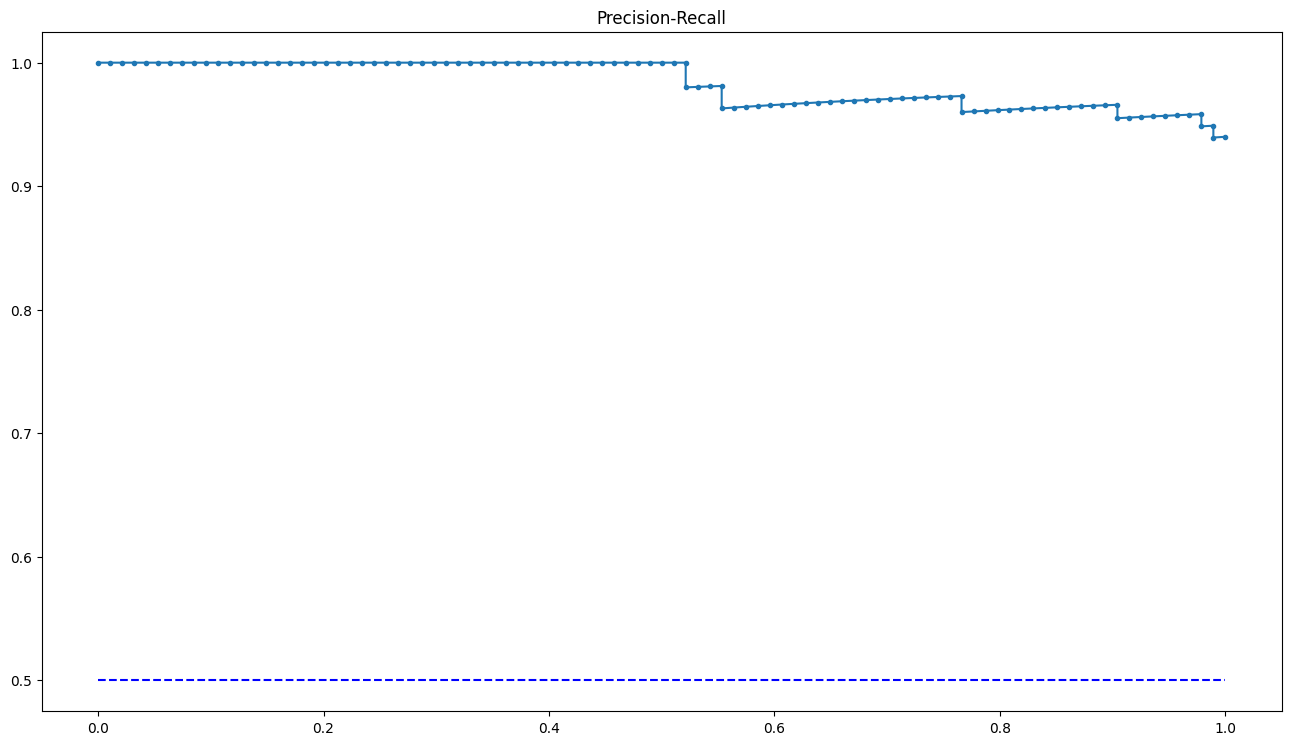

In [30]:
plt.figure(figsize=(16, 9), dpi=100)

plt.plot([0, 1], [0.5, 0.5], linestyle='--', color='blue')
plt.plot(recall, precision, marker='.')

plt.title('Precision-Recall')

plt.show()